# WordCloud Procon 2017

    Esse trabalho focará na análise da base de reclamações fundamentadas que foram à audiência feitas junto ao Procon no ano de 2017. Além da análise gráfca que será feita, ao final, serão criadas WordCouds para empresas, estados e reclamações.

# 1. Importação de bibliotecas

In [81]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import pandas as pd
import os
import numpy as np
import string
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import re
import missingno as msno
from collections import Counter
from nltk.tokenize import word_tokenize
from PIL import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arthu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 2. Leitura da base de dados

In [82]:
data = pd.read_csv('base reclamações.csv', encoding='windows-1252', sep = ';')

# 3. Visualização inicial da base de dados

Verificação das primeiras linhas da base de dados:

In [83]:
data.head()

,Regiao,estado,empresa,subsidiaria,area,serviço,problema,faixa etarea
0,Sudeste,SP,ITAÚ UNIBANCO S/A,BANCO ITAÚ/BANCO UNIBANCO,"BANCOS MÚLTIPLOS, COM CARTEIRA COMERCIAL",Outros Contratos,"Contrato (não cumprimento, alteração, transfer...",entre 31 a 40 anos
1,Sudeste,SP,CLARO S/A,NET,NaN,Telefonia Fixa ( Plano de Expansão / Compra e ...,Contrato - Rescisão/alteração unilateral,mais de 70 anos
2,Sudeste,SP,ELETROPAULO METROPOLITANA ELETRICIDADE DE S PAULO,ELETROPAULO METROPOLITANA,DISTRIBUIÇÃO DE ENERGIA ELÉTRICA,Energia Elétrica,PID - Pedido de Indenização por Danos Morais,entre 31 a 40 anos
3,Sudeste,SP,GNN GARAGENS LTDA - EPP,NETPARK.COM.BR,ESTACIONAMENTO DE VEÍCULOS,"Estacionamento ( Particular, Supermercado, Sho...","Vicio de qualidade (mal executado, inadequado,...",entre 31 a 40 anos
4,Sudeste,SP,CLARO S/A,CLARO / NET / EMBRATEL / CLAROTV,TELEFONIA MÓVEL CELULAR,Telefonia Fixa ( Plano de Expansão / Compra e ...,"Vicio de qualidade (mal executado, inadequado,...",entre 41 a 50 anos


Forma do DataFrame (linhas e colunas):

O DataFrame possui 42307 linhas e 8 colunas.

In [84]:
data.shape

(42307, 8)

Nomes das colunas do DataFrame:

In [85]:
data.columns

Index(['Regiao ', 'estado', 'empresa', 'subsidiaria  ', 'area ', 'serviço',
       'problema', 'faixa etarea'],
      dtype='object')

# 4. Análises Gráficas

Plotagem de gráfico de reclamações por Faixa Etárea:

Podemos notar no gráfico abaixo que as faixas etáreas que mais registram reclamações são as que constituem a maior porção da força de trabalho. Tal resultado faz sentido visto que são esses grupos que possuem maior poder aquisitivo para o consumo de produtos e serviços.

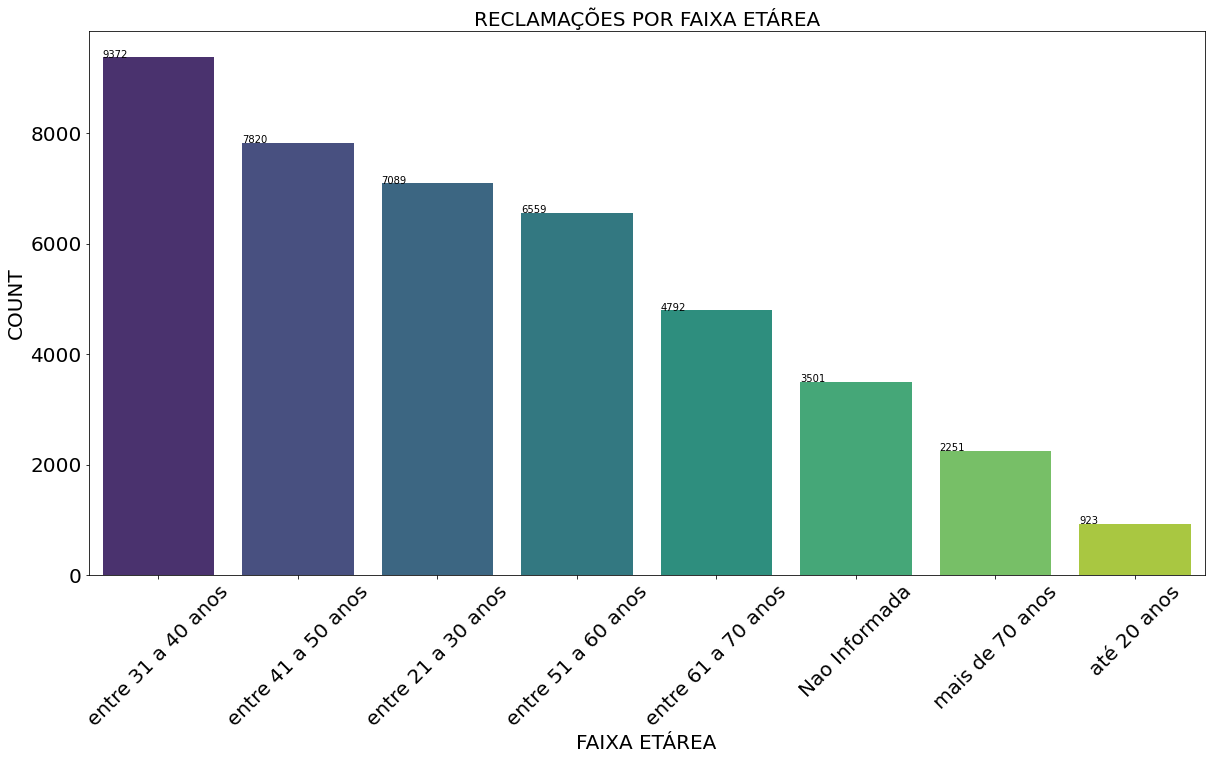

In [86]:
plt.figure(figsize=(20,10))
fig1 = sns.countplot(data=data, x=data['faixa etarea'], order=data['faixa etarea'].value_counts().index, palette='viridis')
fig1.set_xlabel('FAIXA ETÁREA', fontsize=20)
fig1.set_ylabel('COUNT', fontsize=20)
fig1.tick_params(labelsize=20)
fig1.tick_params(axis = 'x', rotation = 45)
plt.title('RECLAMAÇÕES POR FAIXA ETÁREA', fontsize = 20)
for p in fig1.patches:
    txt = str(p.get_height().round(2))
    txt_x = p.get_x() 
    txt_y = p.get_height()
    fig1.text(txt_x,txt_y,txt)
plt.show()

Plotagem de gráfico das empresas com maior número de reclamações:

Podemos notar no gráfico abaixo que no ranking das 10 empresas com o maior número de reclamações temos o forte presença das emrpesas telefônicas. Vale notar que temos duas colunas para a CLARO SA, isso se dá pela falta de uniformidade dos dados, a seguir nesse mesmo trabalho tais dados serão tratatos e o gráfico será gerado novamente para avaliarmos se ocorrerão mudanças significativas.

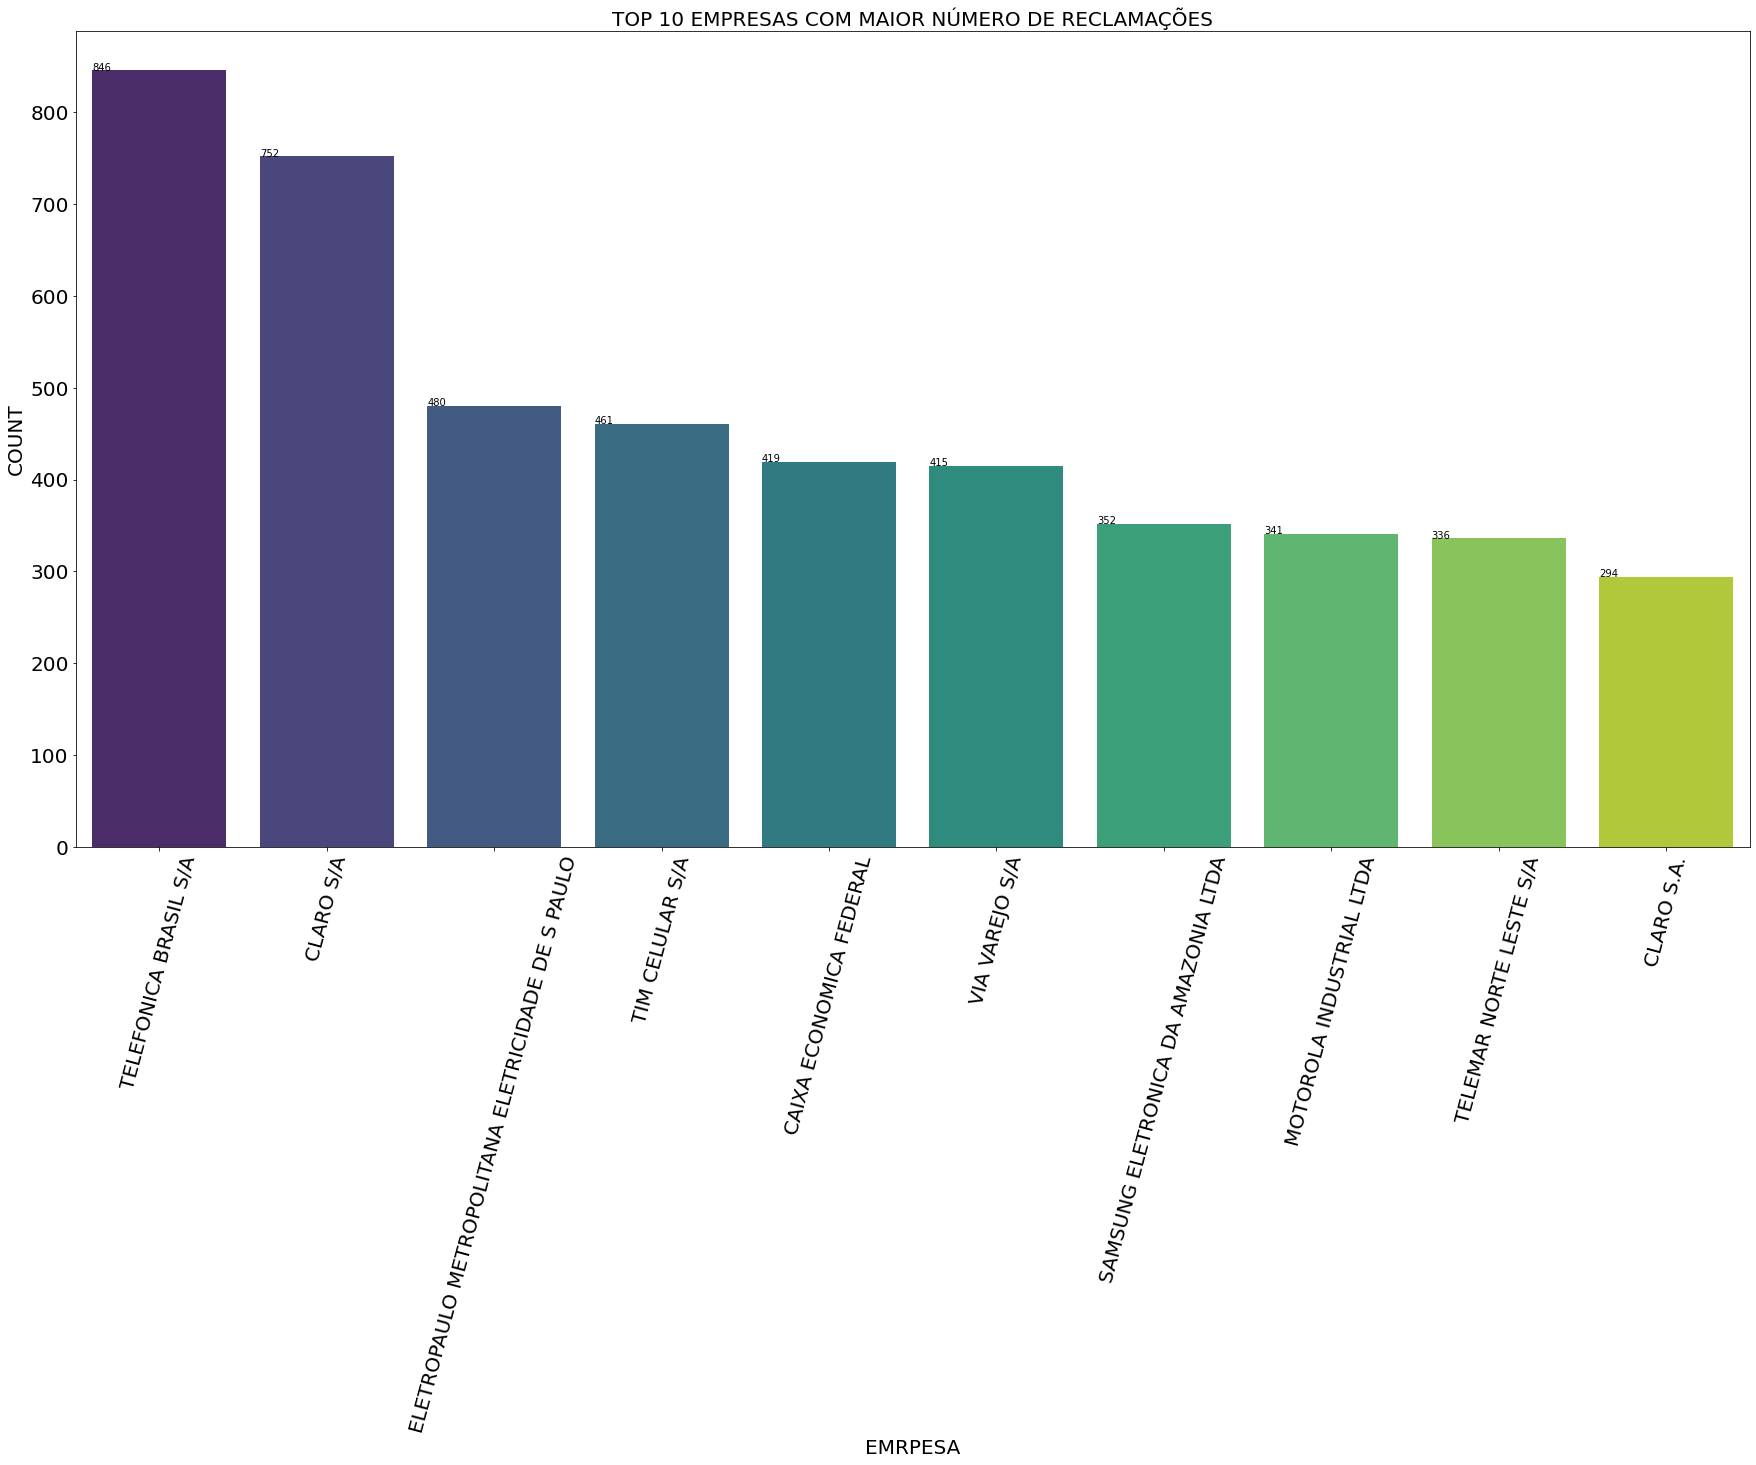

In [87]:
plt.figure(figsize=(30,15))
fig2 = sns.countplot(data=data, x=data['empresa'], order=data['empresa'].value_counts().head(10).index, palette='viridis')
fig2.set_xlabel('EMRPESA', fontsize=20)
fig2.set_ylabel('COUNT', fontsize=20)
fig2.tick_params(labelsize=20)
fig2.tick_params(axis = 'x', rotation = 75)
plt.title('TOP 10 EMPRESAS COM MAIOR NÚMERO DE RECLAMAÇÕES', fontsize = 20)
for p in fig2.patches:
    txt = str(p.get_height().round(2))
    txt_x = p.get_x() 
    txt_y = p.get_height()
    fig2.text(txt_x,txt_y,txt)
plt.show()

Plotagem de gráfico de reclamações por estado:

Vemos em primeiro São Paulo, estado mais populoso e rico da federação sendo assim, a primeira colocação já era esperada. Porém, nas posições subsequentes, as espectativas não se confirmaram. Vale apontar a presença de Goiás na segunda posição com número bem próximo de São Paulo. Outra surpresa foi a posição de Minas Gerais, apenas na sexta posição, colocação baixa para para o segundo estado com maior população e terceiro em PIB. Uma ausência notada foi a do Rio de Janeiro que não possui regitros neste dataset.

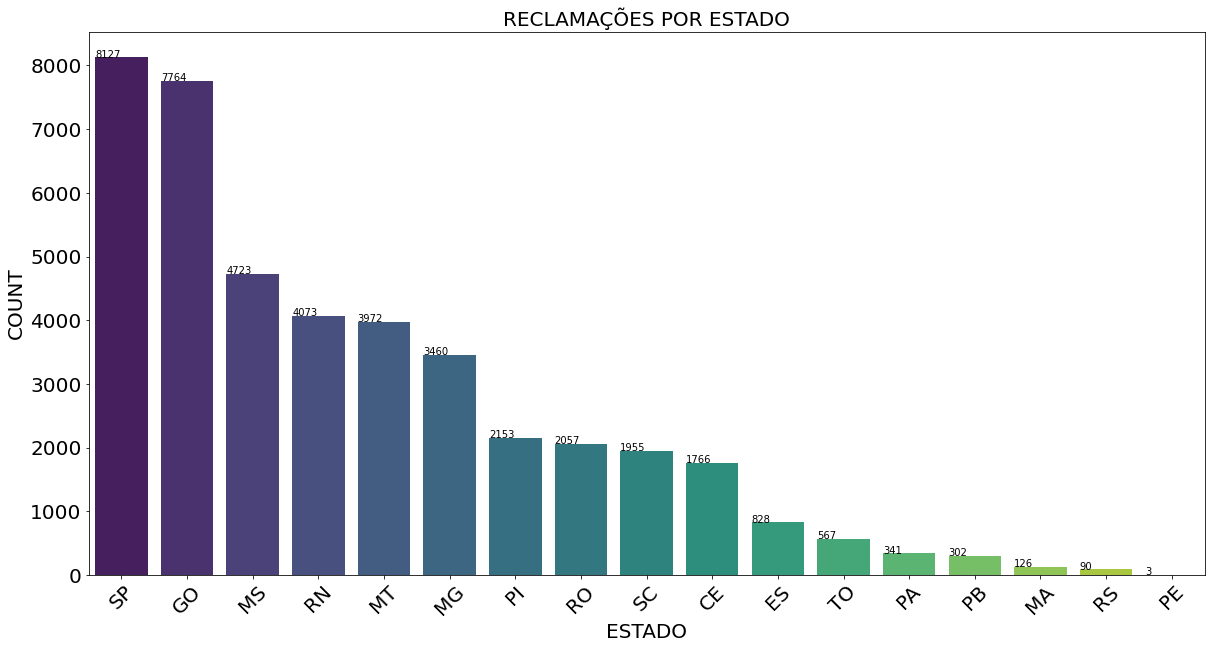

In [88]:
plt.figure(figsize=(20,10))
fig3 = sns.countplot(data=data, x=data['estado'], order=data['estado'].value_counts().index, palette='viridis')
fig3.set_xlabel('ESTADO', fontsize=20)
fig3.set_ylabel('COUNT', fontsize=20)
fig3.tick_params(labelsize=20)
fig3.tick_params(axis = 'x', rotation = 45)
plt.title('RECLAMAÇÕES POR ESTADO', fontsize = 20)
for p in fig3.patches:
    txt = str(p.get_height().round(2))
    txt_x = p.get_x() 
    txt_y = p.get_height()
    fig3.text(txt_x,txt_y,txt)
plt.show()

Plotagem de gráfico de reclamações por tipo de serviço:

Assim como no gráfico de reclamações por empresas, temos uma predominância de serviços da área de telefonia, ocupando as 3 primeiras posições.

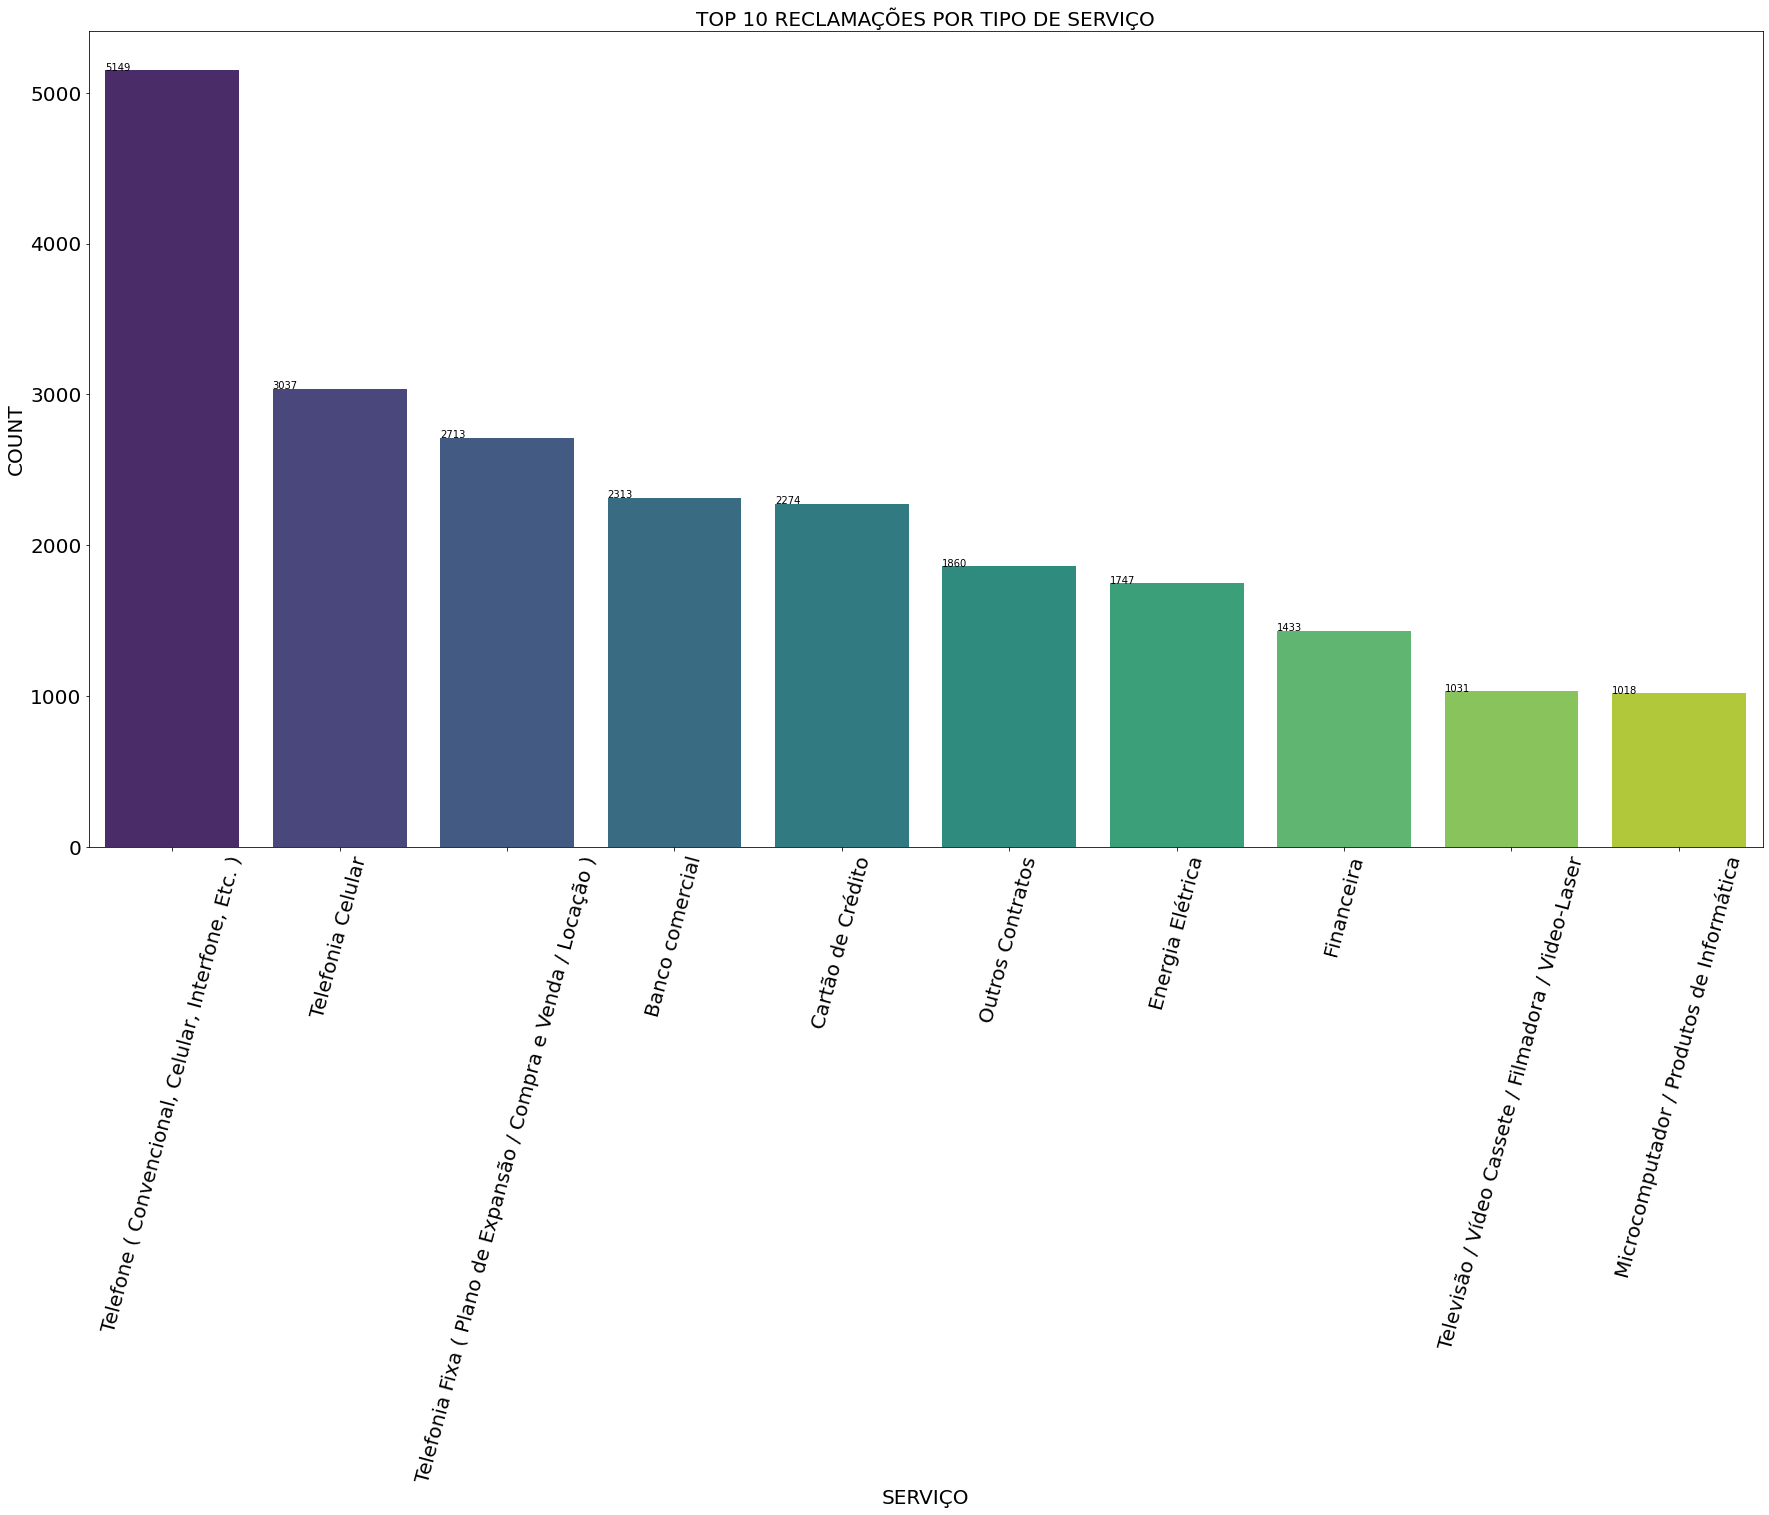

In [89]:
plt.figure(figsize=(30,15))
fig4 = sns.countplot(data=data, x=data['serviço'], order=data['serviço'].value_counts().head(10).index, palette='viridis')
fig4.set_xlabel('SERVIÇO', fontsize=20)
fig4.set_ylabel('COUNT', fontsize=20)
fig4.tick_params(labelsize=20)
fig4.tick_params(axis = 'x', rotation = 75)
plt.title('TOP 10 RECLAMAÇÕES POR TIPO DE SERVIÇO', fontsize = 20)
for p in fig4.patches:
    txt = str(p.get_height().round(2))
    txt_x = p.get_x() 
    txt_y = p.get_height()
    fig4.text(txt_x,txt_y,txt)
plt.show()

Plotagem de gráfico de reclamações por tipo de problema:

Nessa plotagem podemos perceber que a reclamações mais pertinentes são provenientes de produtos com vício(problemas) e cobranças indevidas e ou abusivas.

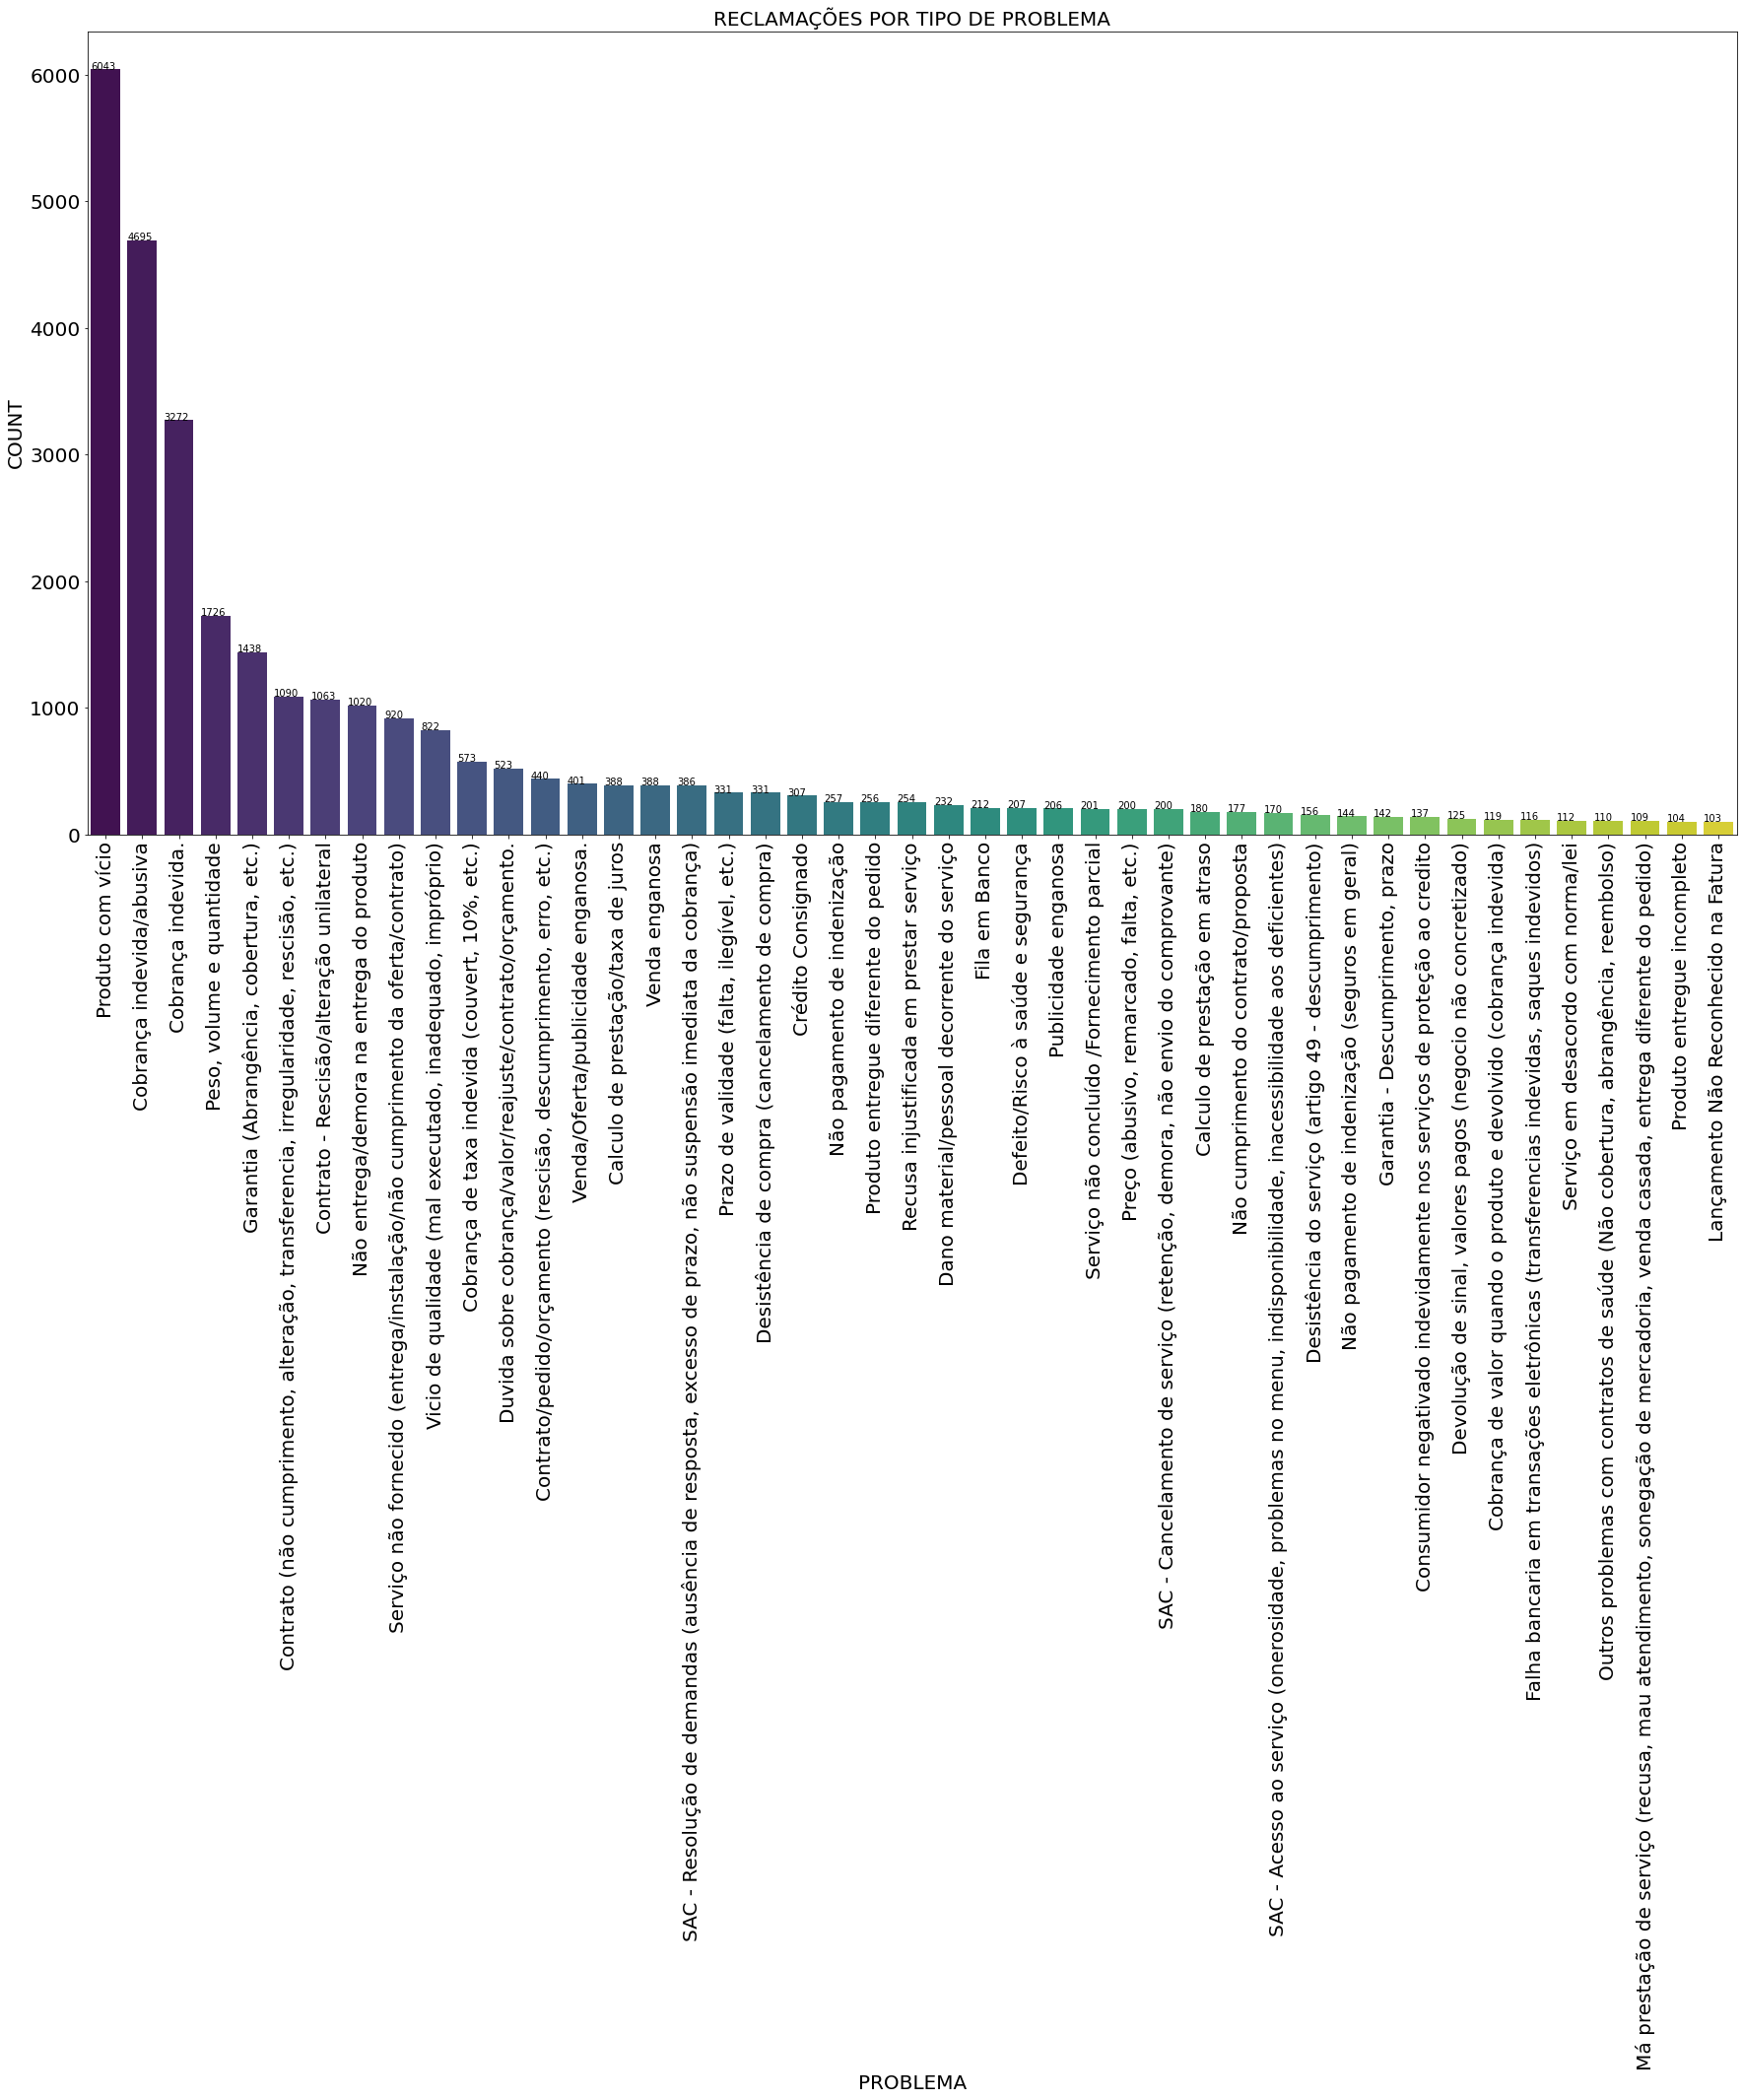

In [90]:
plt.figure(figsize=(30,15))
fig5 = sns.countplot(data=data, x=data['problema'], order=data['problema'].value_counts().head(45).index, palette='viridis')
fig5.set_xlabel('PROBLEMA', fontsize=20)
fig5.set_ylabel('COUNT', fontsize=20)
fig5.tick_params(labelsize=20)
fig5.tick_params(axis = 'x', rotation = 90)
plt.title('RECLAMAÇÕES POR TIPO DE PROBLEMA', fontsize = 20)
for p in fig5.patches:
    txt = str(p.get_height().round(2))
    txt_x = p.get_x() 
    txt_y = p.get_height()
    fig5.text(txt_x,txt_y,txt)
plt.show()

# 5. Análise de Nulos

Abaixo podemos perceber que o DataFrame possui valores nulos nas colunas empresa, subsidiaria, area e problema. Os valores nulos serão tratados de acordo com a necessidade da plotagem das Worclouds que virão a seguir.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42307 entries, 0 to 42306
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Regiao         42307 non-null  object
 1   estado         42307 non-null  object
 2   empresa        42306 non-null  object
 3   subsidiaria    35777 non-null  object
 4   area           36978 non-null  object
 5   serviço        42307 non-null  object
 6   problema       33371 non-null  object
 7   faixa etarea   42307 non-null  object
dtypes: object(8)
memory usage: 2.6+ MB


Regiao              0
estado              0
empresa             1
subsidiaria      6530
area             5329
serviço             0
problema         8936
faixa etarea        0
dtype: int64

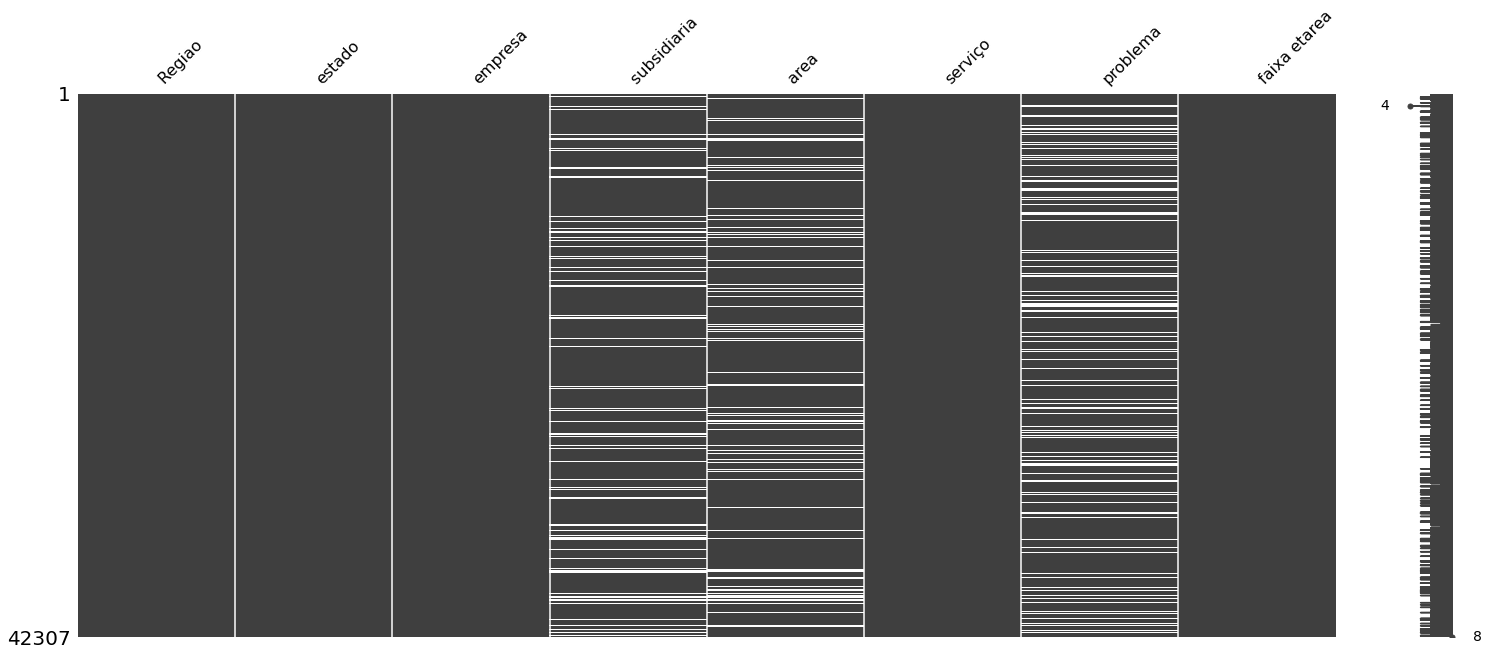

In [91]:
msno.matrix(data)
data.info()
data.isnull().sum()

# 6. Wordcloud Empresas

Criação do DataFrame data_empresas:

In [92]:
data_empresas = pd.DataFrame()
data_empresas ['empresa'] = data['empresa']
data_empresas.head(10)

,empresa
0,ITAÚ UNIBANCO S/A
1,CLARO S/A
2,ELETROPAULO METROPOLITANA ELETRICIDADE DE S PAULO
3,GNN GARAGENS LTDA - EPP
4,CLARO S/A
5,AEROVIAS DEL CONTINENTE AMERICANO S/A
6,B2W COMPANHIA DIGITAL
7,TELEFONICA BRASIL S/A
8,WINNER FIT ACADEMIA
9,SUPERFOR SP VEÍCULOS LTDA


Como visto acima, data possui um registro nulo em empresa. Logo, empresas possui o mesmo registro nulo. Ele será retirado.

In [93]:
data_empresas.dropna(inplace=True)

Substituição de caracteres utilizando regular expressions:

In [94]:
#Substitui " " por "_"

subs_1 = lambda x: re.sub(r" ", "_", x)
data_empresas['empresa tratado'] = data_empresas['empresa'].map(subs_1)

#Substitui "/" por ""

subs_2 = lambda x: re.sub(r"/", "", x)
data_empresas['empresa tratado'] = data_empresas['empresa tratado'].map(subs_2)

#Substitui "-" por ""

subs_3 = lambda x: re.sub(r"-", "", x)
data_empresas['empresa tratado'] = data_empresas['empresa tratado'].map(subs_3)

#Substitui "." por ""

subs_4 = lambda x: re.sub(r"\.", "", x)
data_empresas['empresa tratado'] = data_empresas['empresa tratado'].map(subs_4)

#Substitui "," por "" 

#subs_5 = lambda x: re.sub(r",", "", x)
#data_empresas['empresa tratado'] = data_empresas['empresa tratado'].map(subs_5)

data_empresas.head()



,empresa,empresa tratado
0,ITAÚ UNIBANCO S/A,ITAÚ_UNIBANCO_SA
1,CLARO S/A,CLARO_SA
2,ELETROPAULO METROPOLITANA ELETRICIDADE DE S PAULO,ELETROPAULO_METROPOLITANA_ELETRICIDADE_DE_S_PAULO
3,GNN GARAGENS LTDA - EPP,GNN_GARAGENS_LTDA__EPP
4,CLARO S/A,CLARO_SA


Plotagem de gráfico das empresas com maior número de reclamações:

Podemos notar no gráfico abaixo que no ranking das 10 empresas com o maior número de reclamações temos o forte presença das emrpesas telefônicas. Vale notar que temos duas colunas para a CLARO SA, isso se dá pela falta de uniformidade dos dados, a seguir nesse mesmo trabalho tais dados serão tratatos e o gráfico será gerado novamente para avaliarmos se ocorrerão mudanças significativas.

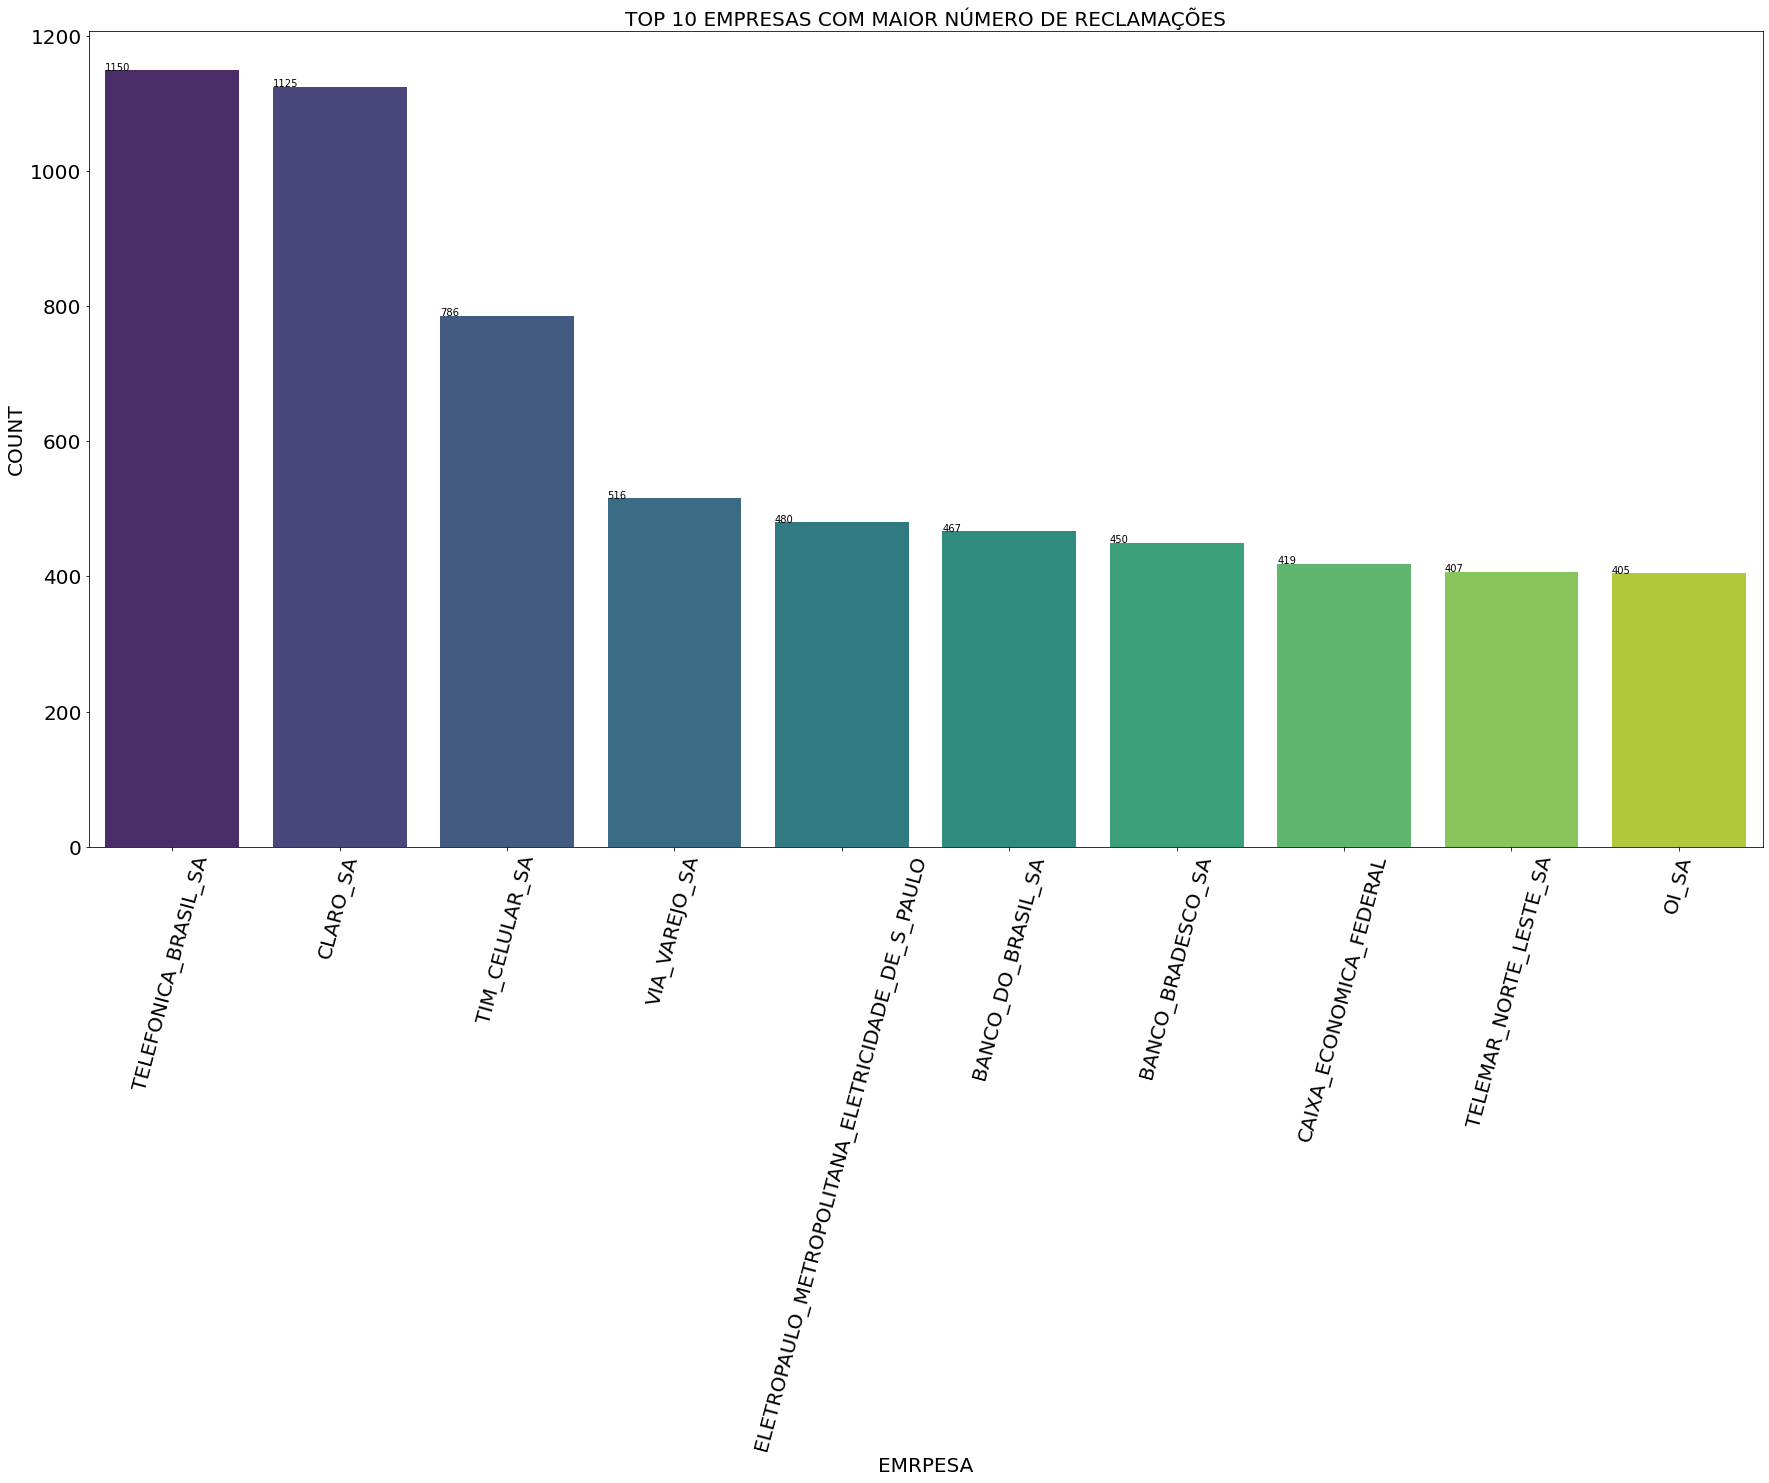

In [95]:
plt.figure(figsize=(30,15))
fig2 = sns.countplot(data=data, x=data_empresas['empresa tratado'], order=data_empresas['empresa tratado'].value_counts().head(10).index, palette='viridis')
fig2.set_xlabel('EMRPESA', fontsize=20)
fig2.set_ylabel('COUNT', fontsize=20)
fig2.tick_params(labelsize=20)
fig2.tick_params(axis = 'x', rotation = 75)
plt.title('TOP 10 EMPRESAS COM MAIOR NÚMERO DE RECLAMAÇÕES', fontsize = 20)
for p in fig2.patches:
    txt = str(p.get_height().round(2))
    txt_x = p.get_x() 
    txt_y = p.get_height()
    fig2.text(txt_x,txt_y,txt)
plt.show()

Converter as letras em minúsculas:

In [96]:
data_empresas['empresa tratado'] = data_empresas['empresa tratado'].str.lower()

Criar string com todos os registros da coluna 'empresa tratado':

In [97]:
string_empresas = " ".join(x for x in data_empresas['empresa tratado'])

Gerar e plotar Wordcloud de Empresas:

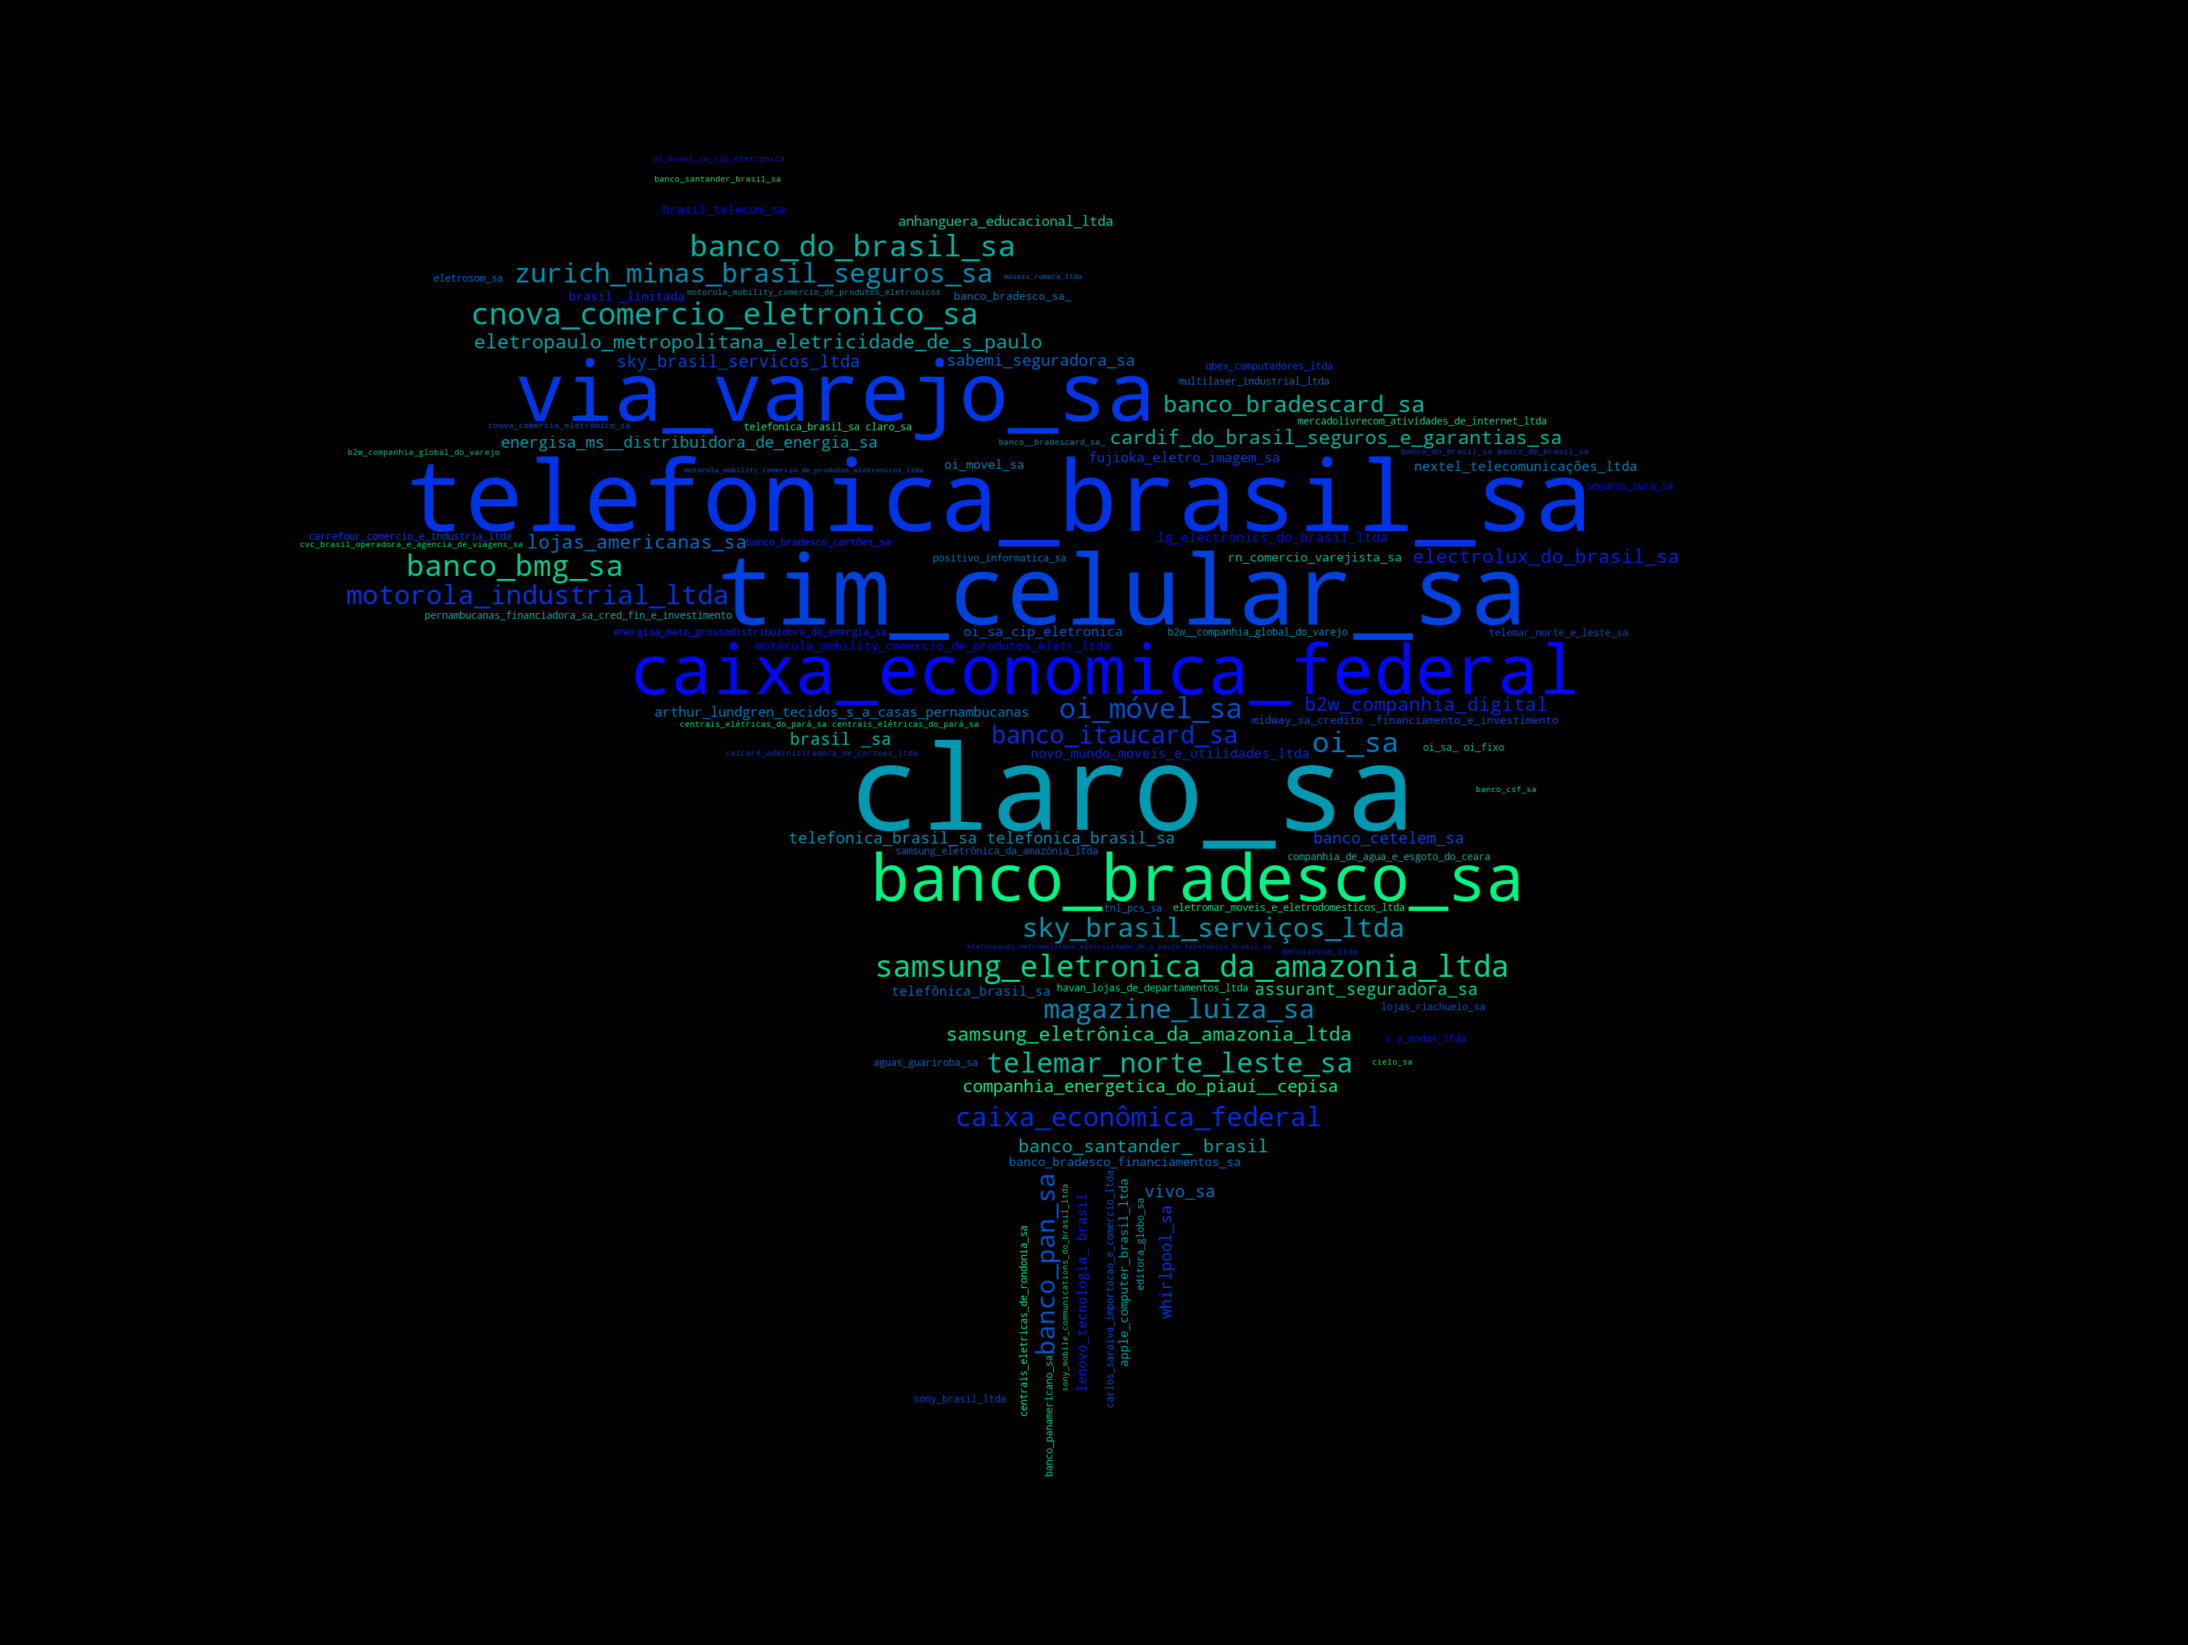

In [98]:
BRA_mask = np.array(Image.open("brasil.jpg"))

wordcloud_empresas = WordCloud(width=3000, height=2000, colormap = 'winter', background_color='black', max_words = 100, mask = BRA_mask).generate(string_empresas)
plt.figure(figsize=(40,30),facecolor = 'k')
plt.imshow(wordcloud_empresas, interpolation='bilinear')
plt.axis('off')
plt.show()

# 7. Wordcloud Estados

Criação do dataframe data_empresas:

In [99]:
data_estados = pd.DataFrame()
data_estados ['estado'] = data['estado']
data_estados.head(10)

,estado
0,SP
1,SP
2,SP
3,SP
4,SP
5,SP
6,SP
7,SP
8,SP
9,SP


Criação da string com todos os registros da coluna 'estado':

In [100]:
string_estados = " ".join(x for x in data_estados['estado'])

Tokenização da string de Estados:

In [101]:
string_estados_tokenized = word_tokenize(string_estados)

Conversão da string em um dicionário com a contagem dos termos:

In [102]:
count_string_estados_tokenized = Counter(string_estados_tokenized)

Análise do dicionário criado:

In [103]:
count_string_estados_tokenized

Counter({'SP': 8127,
         'PA': 341,
         'RO': 2057,
         'MA': 126,
         'SC': 1955,
         'RN': 4073,
         'MG': 3460,
         'ES': 828,
         'MS': 4723,
         'MT': 3972,
         'GO': 7764,
         'RS': 90,
         'TO': 567,
         'PI': 2153,
         'PB': 302,
         'PE': 3,
         'CE': 1766})

Geração e plotagem da Wordcloud de Estados:

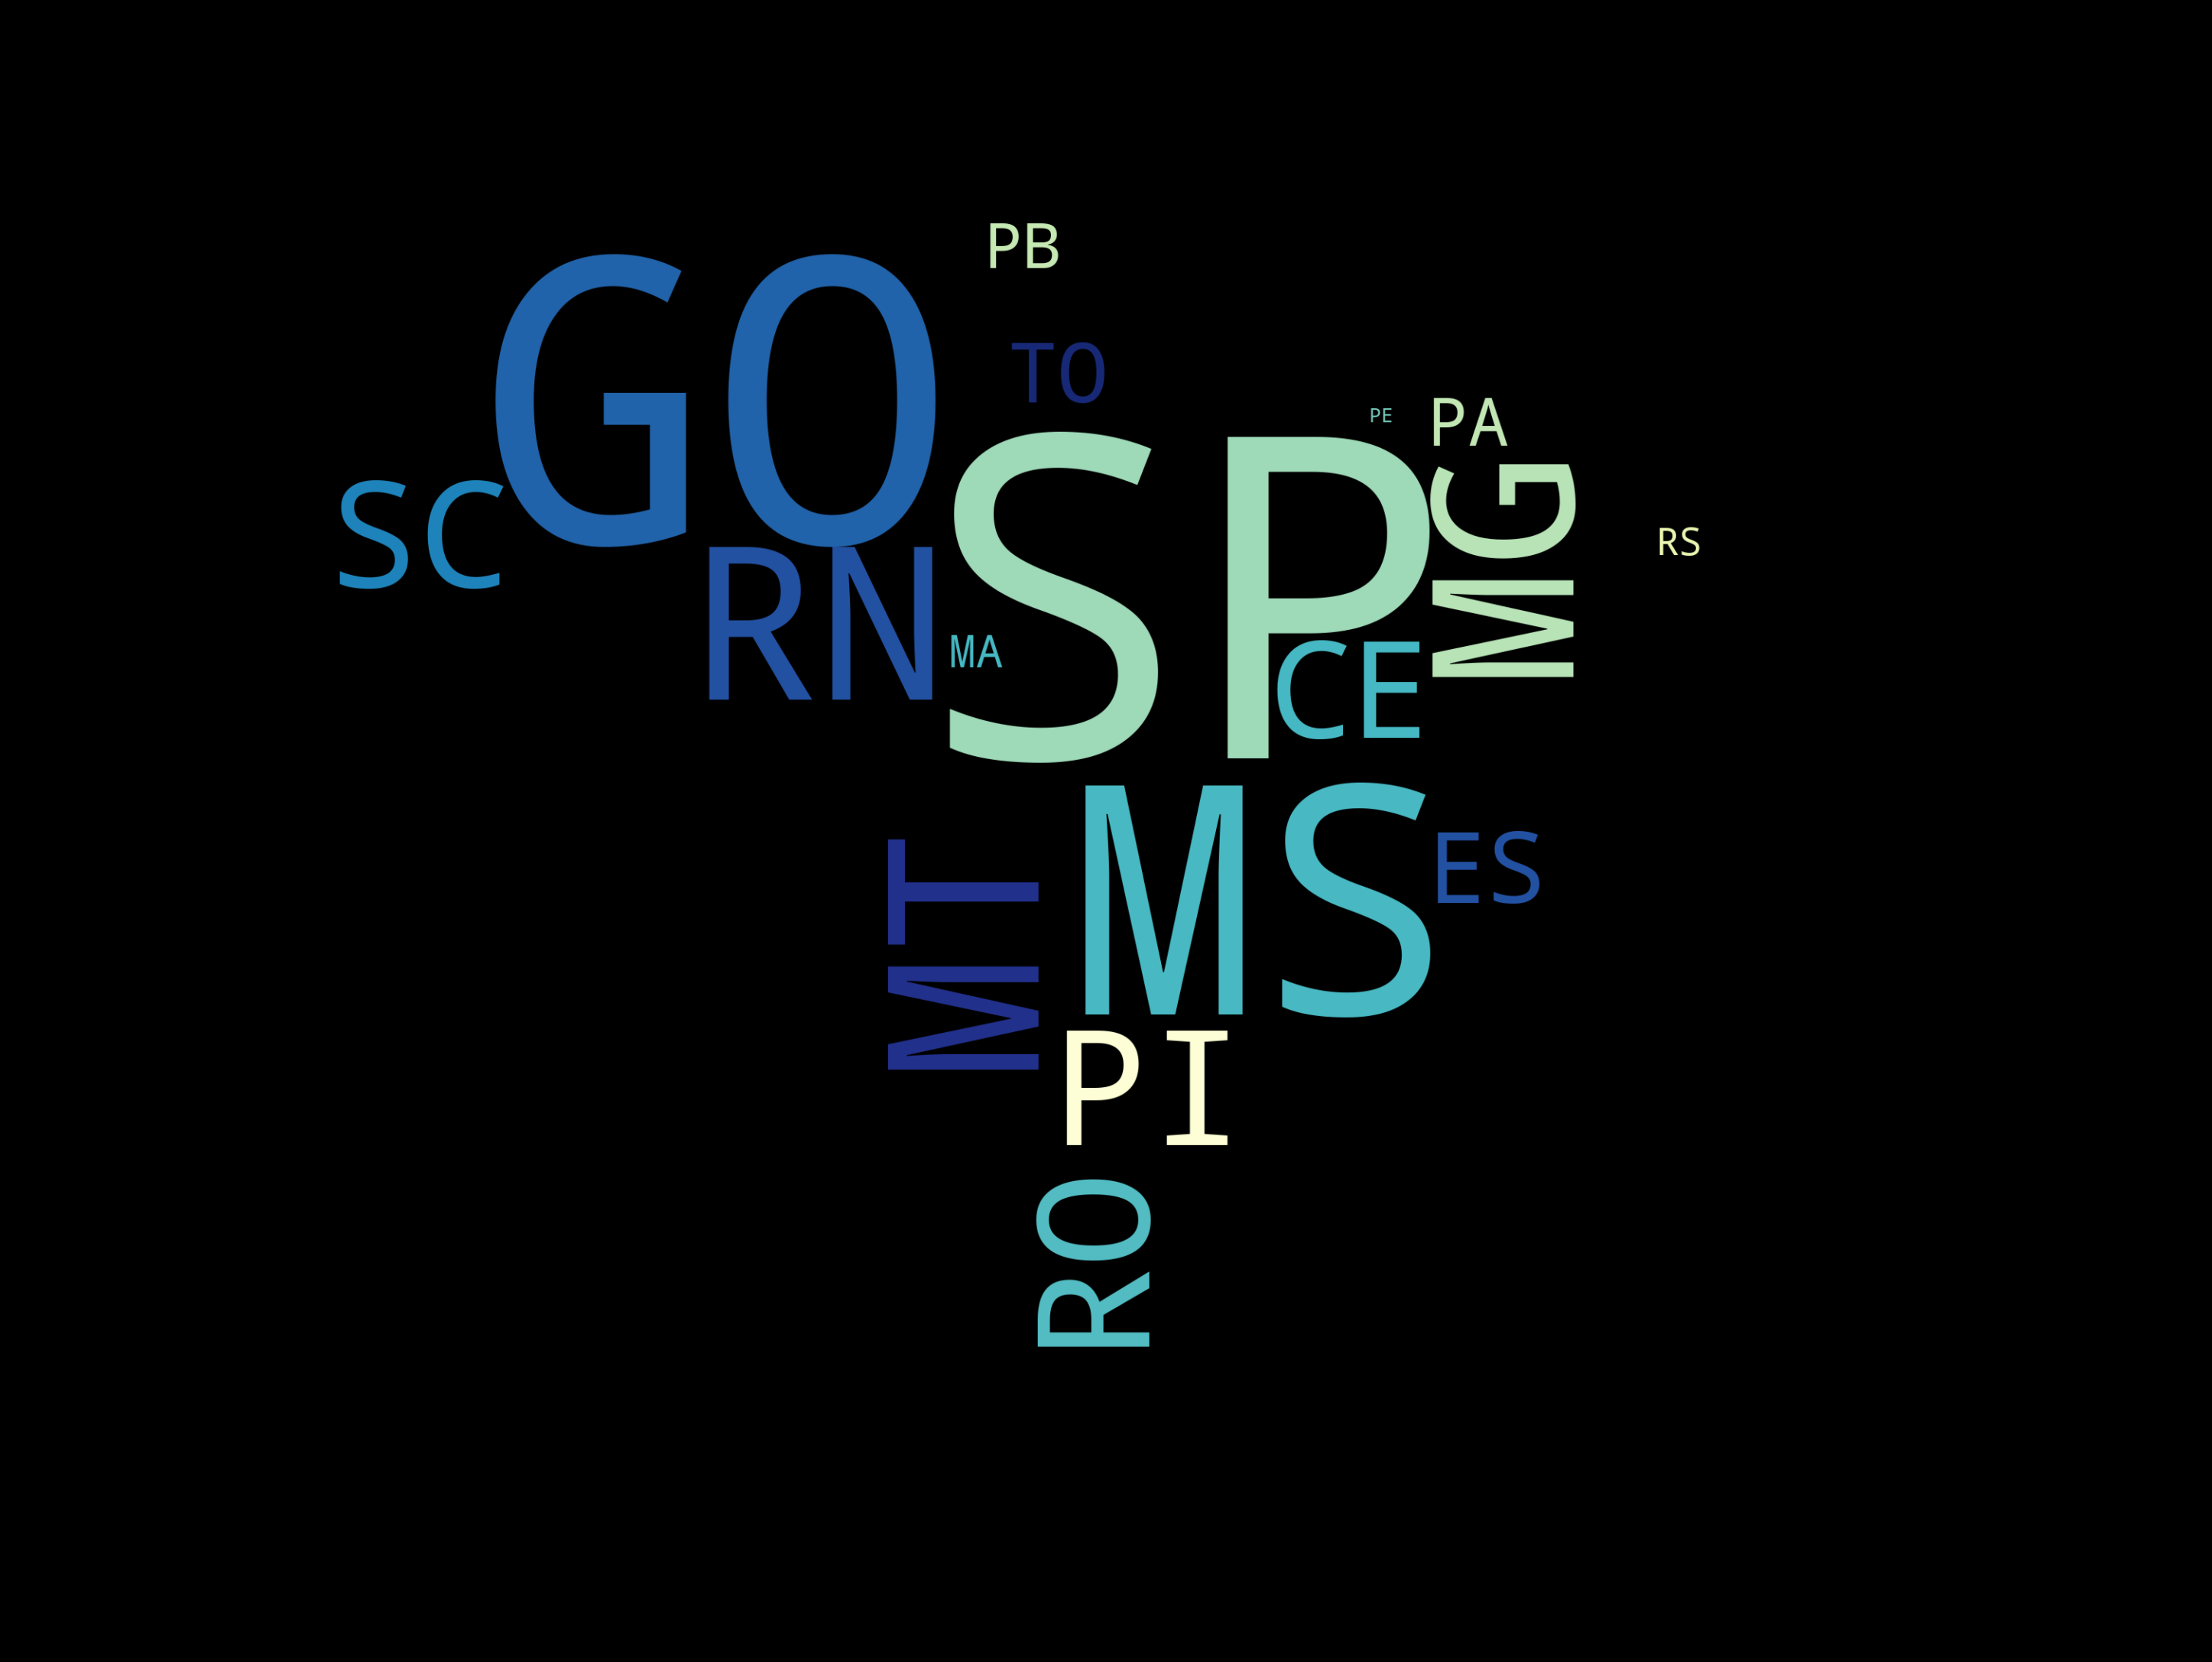

In [104]:
BRA_mask = np.array(Image.open("brasil.jpg"))


wordcloud_empresas = WordCloud(width=2000, height=1000, colormap='YlGnBu', background_color='black', max_words = 17, prefer_horizontal = 0.9, mask = BRA_mask).generate_from_frequencies(count_string_estados_tokenized)
plt.figure(figsize=(40,30), facecolor = 'k')
plt.imshow(wordcloud_empresas, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# 8. Wordcloud Serviço

Criação do dataframe data_servicos:

In [105]:
#Criação do dataframe data_servicos

data_servicos = pd.DataFrame()
data_servicos['serviço'] = data['serviço']
data_servicos.head(10)

,serviço
0,Outros Contratos
1,Telefonia Fixa ( Plano de Expansão / Compra e ...
2,Energia Elétrica
3,"Estacionamento ( Particular, Supermercado, Sho..."
4,Telefonia Fixa ( Plano de Expansão / Compra e ...
5,Agências e Operadoras de viagens (pacotes turí...
6,Artigos de Enxoval ( Cama / Mesa e Banho )
7,Telefonia Fixa ( Plano de Expansão / Compra e ...
8,Academia de Ginástica / Natação / Esportes
9,"Oficinas ( Mecânica, Funilaria, Auto-Elétrica,..."


Análise da quantidade de registros por tipo de registro:

In [106]:
data_servicos.value_counts().head(20)

serviço                                                        
Telefone ( Convencional, Celular, Interfone, Etc. )                5149
Telefonia Celular                                                  3037
Telefonia Fixa ( Plano de Expansão / Compra e Venda / Locação )    2713
Banco comercial                                                    2313
Cartão de Crédito                                                  2274
Outros Contratos                                                   1860
Energia Elétrica                                                   1747
Financeira                                                         1433
Televisão / Vídeo Cassete / Filmadora / Video-Laser                1031
Microcomputador / Produtos de Informática                          1018
Seguro                                                              825
Geladeira e Freezer                                                 773
TV Por Assinatura ( Cabo, Satélite, Etc. )                          736


Substituição de caracteres utilizando regular expressions:

In [107]:
#Substitui " " por "_"

subs_1 = lambda x: re.sub(r" ", " ", x)
data_servicos['serviço tratado'] = data_servicos['serviço'].map(subs_1)

#Substitui "/" por ""

subs_2 = lambda x: re.sub(r"/", "", x)
data_servicos['serviço tratado'] = data_servicos['serviço tratado'].map(subs_2)

#Substitui "-" por ""

subs_3 = lambda x: re.sub(r"-", "", x)
data_servicos['serviço tratado'] = data_servicos['serviço tratado'].map(subs_3)

#Substitui "." por ""

subs_4 = lambda x: re.sub(r"\.", "", x)
data_servicos['serviço tratado'] = data_servicos['serviço tratado'].map(subs_4)

#Substitui "," por "" 

subs_5 = lambda x: re.sub(r",", "", x)
data_servicos['serviço tratado'] = data_servicos['serviço tratado'].map(subs_5)


subs_6 = lambda x: re.sub(r'\(', "", x)
data_servicos['serviço tratado'] = data_servicos['serviço tratado'].map(subs_6)


subs_7 = lambda x: re.sub(r'\)', "", x)
data_servicos['serviço tratado'] = data_servicos['serviço tratado'].map(subs_7)

data_servicos.head()

,serviço,serviço tratado
0,Outros Contratos,Outros Contratos
1,Telefonia Fixa ( Plano de Expansão / Compra e ...,Telefonia Fixa Plano de Expansão Compra e Ve...
2,Energia Elétrica,Energia Elétrica
3,"Estacionamento ( Particular, Supermercado, Sho...",Estacionamento Particular Supermercado Shoppi...
4,Telefonia Fixa ( Plano de Expansão / Compra e ...,Telefonia Fixa Plano de Expansão Compra e Ve...


Converter as letras em minúsculas:

In [108]:
data_servicos['serviço tratado'] = data_servicos['serviço tratado'].str.lower()

Criação da string com todos os registros da coluna 'serviço tratado':

In [109]:
string_serviços = " ".join(x for x in data_servicos['serviço tratado'])

Tokenização da string de Serviços:

In [110]:
string_serviços_tokenized = word_tokenize(string_serviços)

Criação da lista de stopWords com palavras da língua portuguesa:

In [111]:
stopWords_list = list(stopwords.words('portuguese'))
append_words = ['1º', '2º', 'etc', 'Etc']
stopWords_list = stopWords_list + append_words

Análise da lista de stopWords:

In [112]:
print(stopWords_list)

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estiv

Retirada das stopWords de string_serviços:

In [113]:
string_serviços_tokenized_cleaned = [word for word in string_serviços_tokenized if not (word in stopWords_list)]

Conversão da string em um dicionário com a contagem dos termos:

In [114]:
count_string_serviços_tokenized_cleaned = Counter(string_serviços_tokenized_cleaned)

Análise do dicionário criado:

In [115]:
count_string_serviços_tokenized_cleaned

Counter({'outros': 3518,
         'contratos': 1860,
         'telefonia': 5772,
         'fixa': 2713,
         'plano': 3101,
         'expansão': 2713,
         'compra': 2856,
         'venda': 2761,
         'locação': 2951,
         'energia': 1747,
         'elétrica': 1796,
         'estacionamento': 40,
         'particular': 40,
         'supermercado': 387,
         'shopping': 40,
         'agências': 720,
         'operadoras': 720,
         'viagens': 720,
         'pacotes': 720,
         'turísticos': 720,
         'artigos': 60,
         'enxoval': 60,
         'cama': 60,
         'mesa': 60,
         'banho': 60,
         'academia': 80,
         'ginástica': 91,
         'natação': 80,
         'esportes': 80,
         'oficinas': 99,
         'mecânica': 99,
         'funilaria': 99,
         'autoelétrica': 99,
         'borracharia': 99,
         'telefone': 5149,
         'convencional': 5149,
         'celular': 8186,
         'interfone': 5149,
         'cartã

Geração e plotagem da Wordcloud de Serviços:

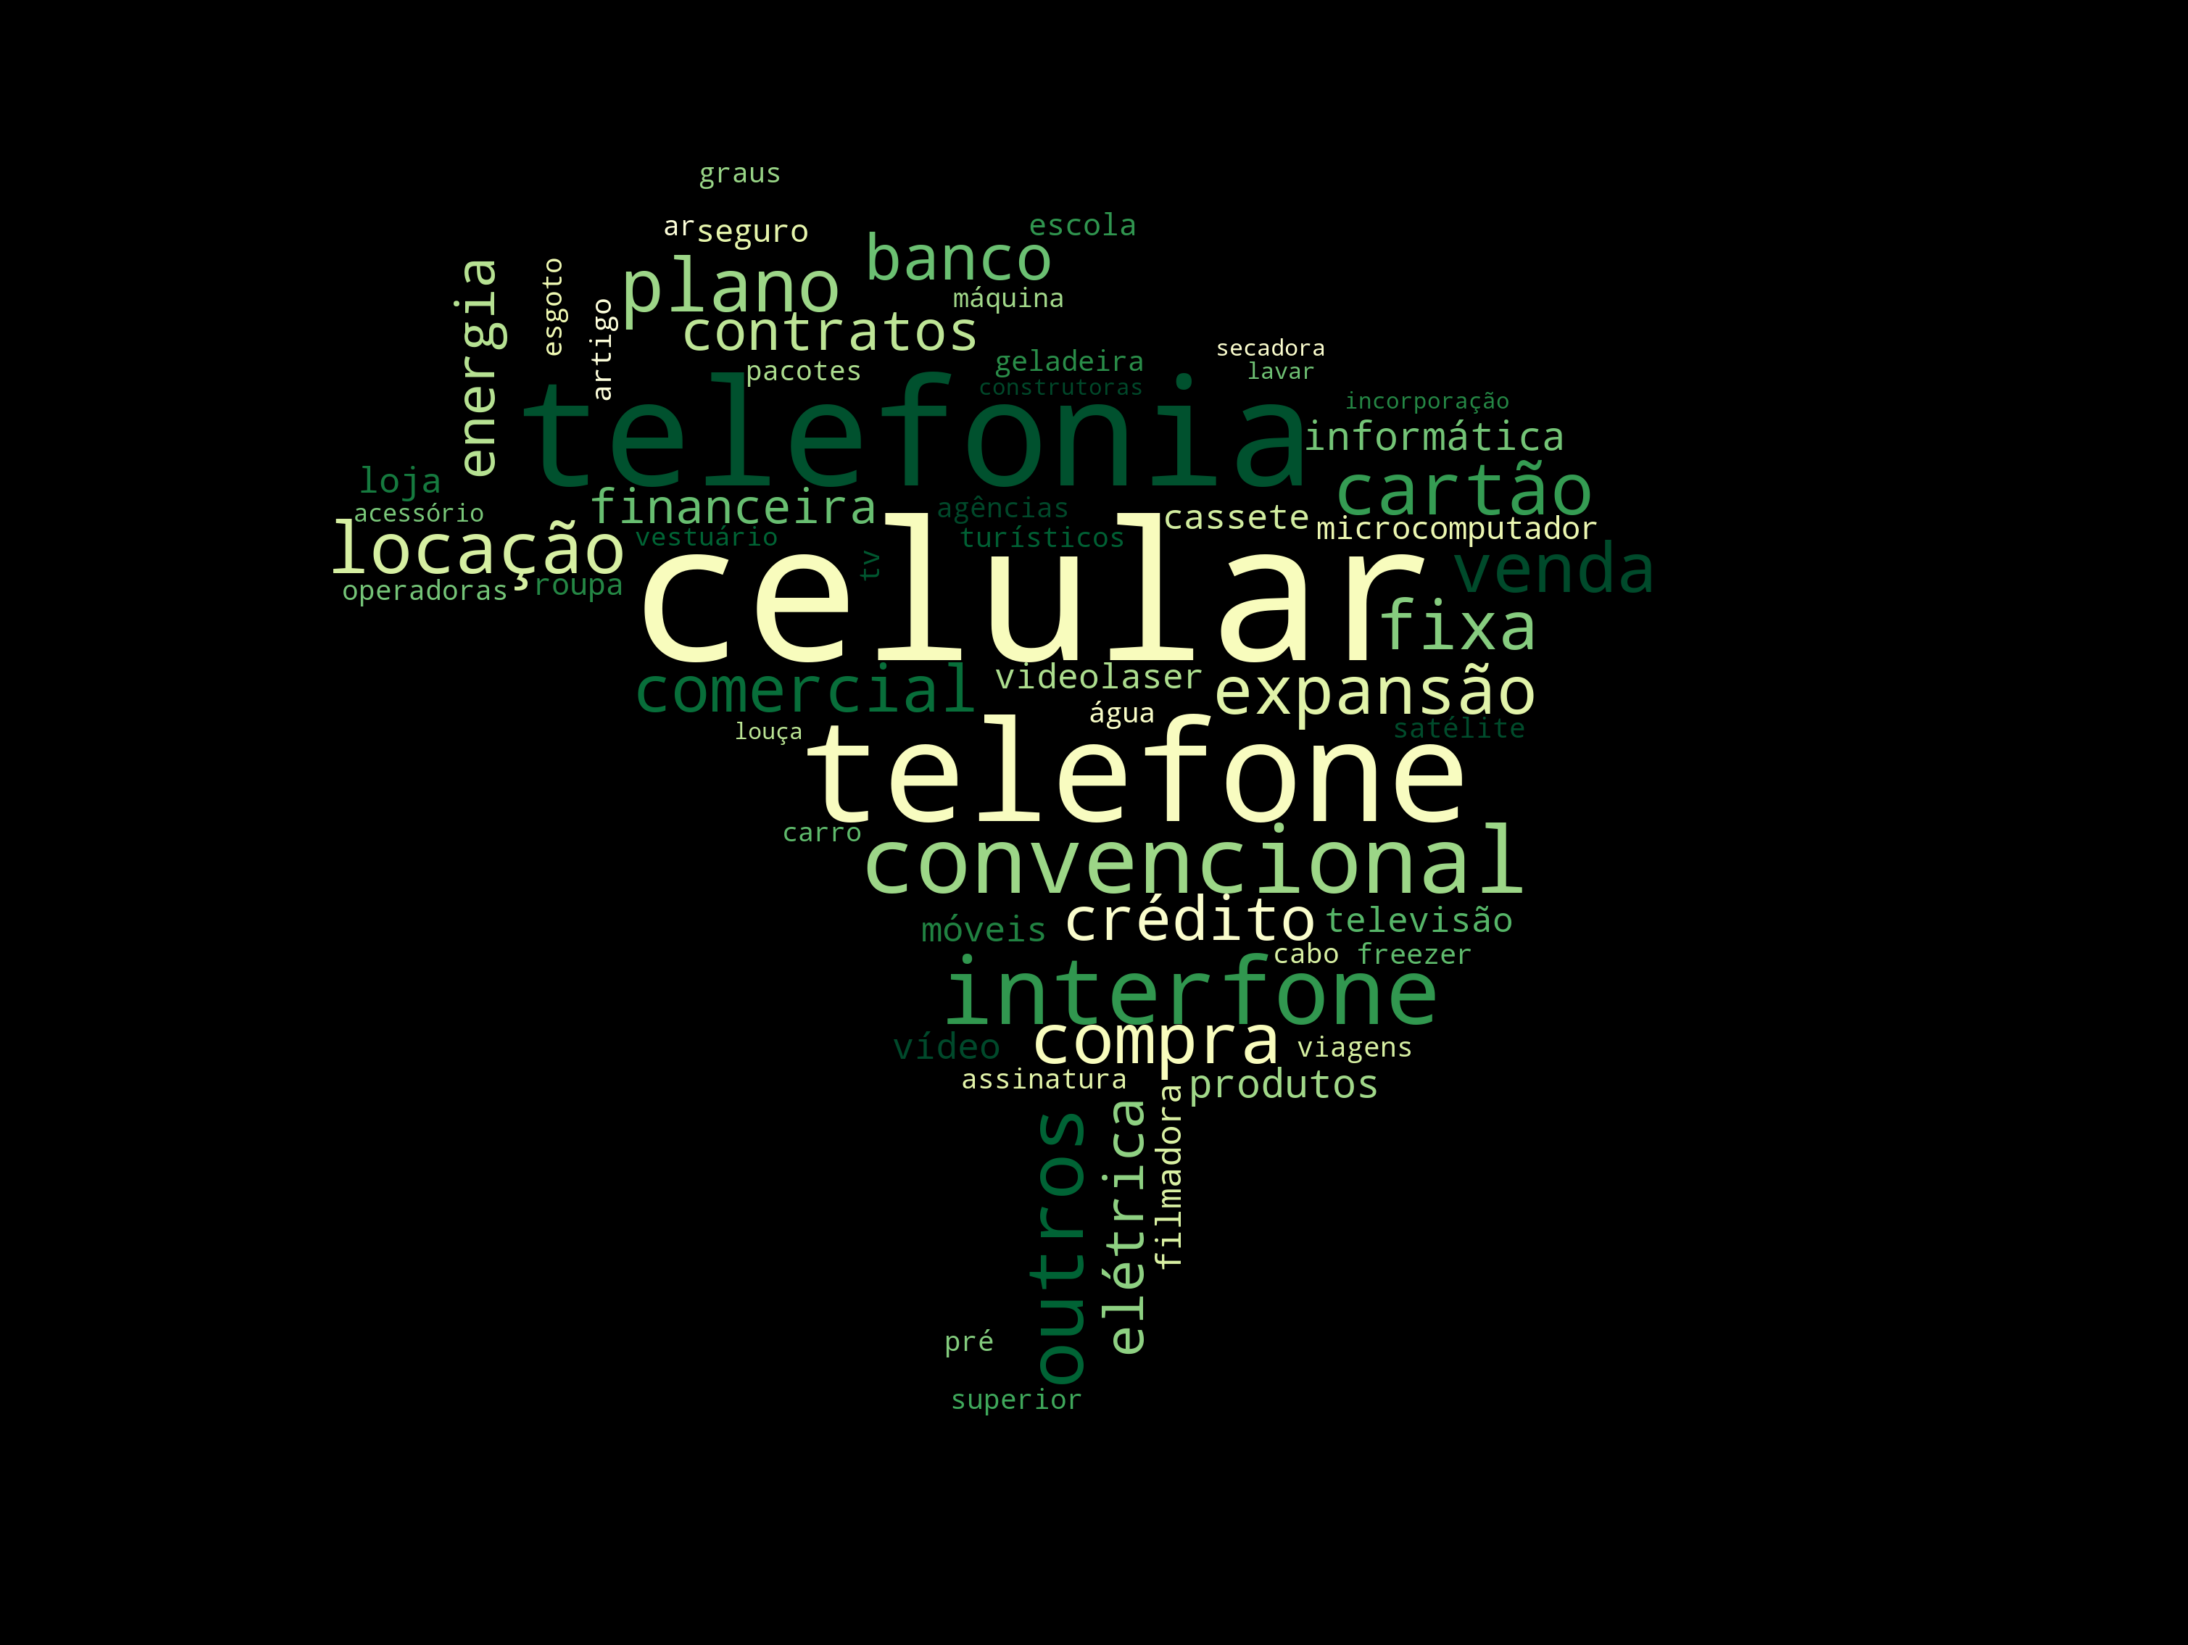

In [116]:
BRA_mask = np.array(Image.open("brasil.jpg"))

wordcloud_empresas = WordCloud(width=3000, height=2000, colormap = 'YlGn', background_color='black', max_words = 60, mask = BRA_mask).generate_from_frequencies(count_string_serviços_tokenized_cleaned)
plt.figure(figsize=(40,30),facecolor = 'k')
plt.imshow(wordcloud_empresas, interpolation='bilinear')
plt.axis('off')
plt.show()